In [65]:
import pickle #for reading the given files
import numpy as np 
import cv2 #to read images
import matplotlib.pyplot as plt #to show images and graphs

#importing for our model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, Flatten,MaxPooling2D,Dropout,Activation
import tensorflow as tf

## Loading the data

In [13]:
with open('train_image.pkl', 'rb') as f:
    train = pickle.load(f)
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f)
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)

In [84]:
#Converting to numpy nd array
train_np = np.array(train)
test_np = np.array(test)
train_labels_np = np.array(train_labels)

In [85]:
train_np.shape,test_np.shape,train_labels_np.shape

((8000, 784), (2000, 784), (8000,))

### reshaping the images in appropriate size (-1,28,28,1)

In [86]:
train_img = train_np.reshape(-1,28,28,1)
test_img = test_np.reshape(-1,28,28,1)

In [87]:
np.random.shuffle(train_labels_np)
set(train_labels_np)
#converting these labels to (0,1,2,3)

{0, 2, 3, 6}

In [88]:
y_train = train_labels_np
for i in range(len(y_train)):
    if(y_train[i] == 0):
        y_train[i] = 0
    elif(y_train[i] == 2):
        y_train[i] = 1
    elif(y_train[i] == 3):
        y_train[i] = 2
    else:
        y_train[i] = 3

In [91]:
y_train[:100]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  

In [90]:
#one-hot encoding the labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(8000, 4)

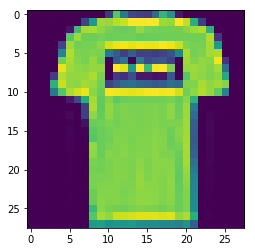

In [92]:
#checking image
plt.imshow(train_np[0].reshape(28,28))
plt.show()

# Model

## Library used to create model: Keras

We are going to create a deep learning model. We are going to use **Convolutional Neural Network(CNN)** as they are highly effective on images and give excellent results on image classification

## Our architecture: 
<ul><li> input image: 28x28x1 image</li></ul>
<ol>
<li>**Convolution layer**: filter: 3*3, units: 64, strides=1,padding: SAME (i.e image size remains same) </li>
<ul><li> output of this layer: 28x28x64</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 14x14x64</li></ul><br/>
<li>**Convolution layer**: filter: 3*3, units: 128, padding: SAME (i.e image size remains same)</li>
<ul><li> output of this layer: 14x14x128</li></ul><br/>
<li>**Maxpool layer**: filter:2x2,strides=2</li>
<ul><li> output of this layer: 7x7x128</li></ul><br/>
<li>**Dropout layer**: FOR REGULARIZATION(i.e prevent overfitting)</li>
<li>**Flatten**: Now we flatten the array to pass it through the neural network</li>
<ul><li> output of this layer: (1,6272)</li></ul><br/>
<li>**Dense layer**: 1024 units, activation: relu</li>
<li>**Output layer**: units: 4,activation: softmax</li>
</ol>

In [97]:
#creating a model
model = Sequential()

In [98]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation=tf.nn.softmax))

In [99]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
model.fit(train_img, y_train, epochs=50)

Epoch 1/50
8000/8000 [==============================] - 47s 6ms/step - loss: 12.0717 - acc: 0.2505
Epoch 2/50
8000/8000 [==============================] - 46s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 3/50
8000/8000 [==============================] - 50s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 4/50
8000/8000 [==============================] - 49s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 5/50
8000/8000 [==============================] - 48s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 6/50
8000/8000 [==============================] - 48s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 7/50
8000/8000 [==============================] - 49s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 8/50
8000/8000 [==============================] - 50s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 9/50
8000/8000 [==============================] - 48s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 10/50
8000/8000 [==============================] - 49s 6ms/step - loss: 12.0886 - acc: 0.2500
Epoch 11/